# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [6]:
import pandas as pd
import json
import csv
import sqlite3 as sl
import numpy as np

In [7]:
chem = pd.read_csv('GfG.csv')
chem.head(5)

,Unnamed: 0,title,authors,journal,year,volume,issue,page_start,page_end,article_type,pub_date,abstract
0,10.1021/acs.inorgchem.0c00001,Pb6O5(NO3)2: A Nonlinear Optical Oxynitrate St...,"['Dmitry O. Charkin', 'Artem S. Borisov', 'Igo...",Inorganic Chemistry,2020,59,6,3523.0,3526.0,Communication,"February 24, 2020",A high second harmonic generation response is ...
1,10.1021/acs.inorgchem.0c00003,Fluorinated Biphenyldicarboxylate-Based Metal–...,"['Zhao-Ting Lin', 'Qing-Yan Liu*', 'Ling Yang'...",Inorganic Chemistry,2020,59,6,4030.0,4036.0,Article,"March 2, 2020",A novel fluorinated biphenyldicarboxylate liga...
2,10.1021/acs.inorgchem.0c00004,Theoretical Insight into Palladium(II)–Counter...,"['Yiying Yang', 'Yanhong Liu', 'Rongxiu Zhu', ...",Inorganic Chemistry,2020,59,7,4741.0,4752.0,Article,"March 18, 2020","With two distinct active sites, 2-hydroxy-2′-a..."
3,10.1021/acs.inorgchem.0c00007,Comparative Study for the Cobalt(II)- and Iron...,"['Tuhin Ganguly', 'Amit Majumdar*']",Inorganic Chemistry,2020,59,6,4037.0,4048.0,Article,"March 5, 2020",A unique Co(II)- and Fe(II)-mediated complete ...
4,10.1021/acs.inorgchem.0c00008,Synthesis and Characterization of Cu(II) and M...,"['Joseph D. Schneider', 'Brett A. Smith', 'Gra...",Inorganic Chemistry,2020,59,8,5433.0,5446.0,Article,"April 2, 2020",A group of copper complexes supported by polyd...


In [8]:
chem['length(pages)'] = chem['page_end'] - chem['page_start']

In [9]:
chem.drop(['page_start', 'page_end'], axis = 1, inplace=True)
chem.drop(['Unnamed: 0', 'journal', 'volume', 'issue', 'pub_date'], axis = 1, inplace=True)
chem.head()
chem['num_authors'] = chem['authors'].str.count(',')
chem['num_authors'] = chem['num_authors'] +1

In [10]:
chem.aggregate({"num_authors":['mean', 'min', 'max'],
              "length(pages)":['mean', 'min', 'max']})

,num_authors,length(pages)
mean,4.23192,5.722406
min,1.00000,0.000000
max,72.00000,41.000000


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [13]:
print(chem.dtypes)

title             object
authors           object
year               int64
article_type      object
abstract          object
length(pages)    float64
num_authors        int64
dtype: object


In [15]:
import seaborn as sns

<AxesSubplot:>

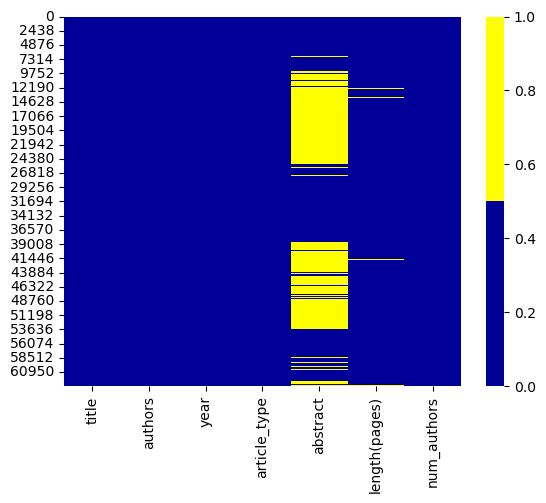

In [16]:
# Plot a heatmap of any missing data

cols = chem.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(chem[cols].isnull(), cmap=sns.color_palette(colours))

In [17]:
for col in chem.columns:
    pct_missing = np.mean(chem[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

title - 0%
authors - 0%
year - 0%
article_type - 0%
abstract - 48%
length(pages) - 1%
num_authors - 0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [11]:
chem.aggregate({"num_authors":['mean', 'min', 'max'],
              "length(pages)":['mean', 'min', 'max']})

,num_authors,length(pages)
mean,4.23192,5.722406
min,1.00000,0.000000
max,72.00000,41.000000


In [12]:
chem.describe()

,year,length(pages),num_authors
count,63371.000000,62559.000000,63371.00000
mean,1996.461189,5.722406,4.23192
std,16.264526,3.337705,2.40813
min,1962.000000,0.000000,1.00000
25%,1984.000000,3.000000,2.00000
50%,1998.000000,5.000000,4.00000
75%,2011.000000,8.000000,5.00000
max,2020.000000,41.000000,72.00000


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [22]:
chem.article_type.unique()

array(['Communication', 'Article', 'Forum Article', 'Editorial',
       'Viewpoint', 'Addition/Correction', 'Featured Article',
       'Award Paper', 'Retraction', 'Note', 'article'], dtype=object)

In [23]:
list_of_values = ['Communication', 'Forum Article', 'Editorial',
       'Viewpoint', 'Addition/Correction',
       'Award Paper', 'Retraction', 'Note']

In [28]:
chem = chem[chem.article_type.isin(list_of_values) == False] # going to drop the articles that aren't actually research

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [29]:
df_dedupped = chem.drop('title', axis=1).drop_duplicates()
print(chem.shape)
print(df_dedupped.shape)

(57405, 7)
(56276, 6)


In [30]:
chem.head()

,title,authors,year,article_type,abstract,length(pages),num_authors
1,Fluorinated Biphenyldicarboxylate-Based Metal–...,"['Zhao-Ting Lin', 'Qing-Yan Liu*', 'Ling Yang'...",2020,Article,A novel fluorinated biphenyldicarboxylate liga...,6.0,6
2,Theoretical Insight into Palladium(II)–Counter...,"['Yiying Yang', 'Yanhong Liu', 'Rongxiu Zhu', ...",2020,Article,"With two distinct active sites, 2-hydroxy-2′-a...",11.0,4
3,Comparative Study for the Cobalt(II)- and Iron...,"['Tuhin Ganguly', 'Amit Majumdar*']",2020,Article,A unique Co(II)- and Fe(II)-mediated complete ...,11.0,2
4,Synthesis and Characterization of Cu(II) and M...,"['Joseph D. Schneider', 'Brett A. Smith', 'Gra...",2020,Article,A group of copper complexes supported by polyd...,13.0,7
5,Four Lead-free Layered Double Perovskites with...,"['Eric T. McClure', 'Abigail P. McCormick', 'P...",2020,Article,"Herein we report the synthesis, structure, and...",7.0,3


In [32]:
chem.describe()

,year,length(pages),num_authors
count,57405.000000,56593.000000,57405.000000
mean,1995.291003,6.054212,4.186238
std,16.499562,3.238809,2.389433
min,1962.000000,0.000000,1.000000
25%,1982.000000,4.000000,2.000000
50%,1996.000000,6.000000,4.000000
75%,2010.000000,8.000000,5.000000
max,2020.000000,29.000000,44.000000


In [33]:
num_authors = chem["authors"].str.split(",")

print(num_authors)
print("Max number of authors = ", num_authors.str.len().max())
print("Index = ", num_authors.str.len().idxmax())
# curious to know why a paper has 72 authors, looking for the paper

1        [['Zhao-Ting Lin',  'Qing-Yan Liu*',  'Ling Ya...
2        [['Yiying Yang',  'Yanhong Liu',  'Rongxiu Zhu...
3                   [['Tuhin Ganguly',  'Amit Majumdar*']]
4        [['Joseph D. Schneider',  'Brett A. Smith',  '...
5        [['Eric T. McClure',  'Abigail P. McCormick', ...
                               ...                        
63366                                                 [[]]
63367                                                 [[]]
63368                                                 [[]]
63369                                                 [[]]
63370                                                 [[]]
Name: authors, Length: 57405, dtype: object
Max number of authors =  44
Index =  38470


In [35]:
some_list = [38470]
chem_filtered = chem[chem.index.isin(some_list)]
chem_filtered.head()

,title,authors,year,article_type,abstract,length(pages),num_authors
38470,Superheavy Element Flerovium (Element 114) Is ...,"['Alexander Yakushev', 'Jacklyn M. Gates', 'An...",2014,Article,The electron shell structure of superheavy ele...,5.0,44


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?